<p align="Right">
  <img width="550" height="250" src="https://www.uexternado.edu.co/wp-content/uploads/2020/07/logo-uec.png">
</p>


#Workshop 1 - Big Data Tools   

##Applying CRISP-DM Methodology

###Students:

- Claudia Castañeda 👩
          
- Keylan Valencia 👨



In [1]:
#Library used

import re
import regex

import locale
import calendar
import datetime

import pandas as pd
from collections import Counter


#import enchant
#import probablepeople as pp
#from wordcloud.wordcloud import STOPWORDS
#from wordcloud import WordCloud


import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, download_plotlyjs, plot, iplot
import matplotlib.pyplot as plt

import sys
import itertools
import numpy as np
from math import log
from itertools import tee
from operator import itemgetter
from collections import defaultdict

In [5]:
#!pip install probablepeople
import probablepeople as pp


In [6]:
from nltk.corpus import stopwords
from wordcloud.wordcloud import STOPWORDS
from wordcloud import WordCloud

In [8]:
#instalar el paquete de Enchant
#!apt install -qq enchant
#!pip install pyenchant
#!pip install enchant
import enchant
#help(enchant)


In [9]:
df = pd.read_csv('Final.csv')
df.columns
df


,Unnamed: 0,Fecha,Usuario,Texto
0,0,"05/05/2023, 22:47",Claubergsaurus Nalguensis,Mira amor
1,1,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
2,2,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
3,3,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
4,4,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
...,...,...,...,...
39907,39907,"15/09/2023, 11:00",Claubergsaurus Nalguensis,Si amor
39908,39908,"15/09/2023, 11:00",Claubergsaurus Nalguensis,Yo te llamo ahorita
39909,39909,"15/09/2023, 11:00",Claubergsaurus Nalguensis,Estoy haciendo esa ppt
39910,39910,"15/09/2023, 11:00",Claubergsaurus Nalguensis,<Media omitted>


In [10]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Fecha,Usuario,Texto
0,"05/05/2023, 22:47",Claubergsaurus Nalguensis,Mira amor
1,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
2,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
3,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
4,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>


In [11]:
#df.Usuario.unique()

df.loc[df['Usuario'] == ' Your security code with Claubergsaurus Nalguensis changed. Tap to learn more.', 'Usuario'] = ' 🌞 Keylan Valencia 🌞'


In [12]:
with open("Final.csv") as file:
    data = file.readlines()

In [13]:
df.head()

,Fecha,Usuario,Texto
0,"05/05/2023, 22:47",Claubergsaurus Nalguensis,Mira amor
1,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
2,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
3,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>
4,"05/05/2023, 22:48",Claubergsaurus Nalguensis,<Media omitted>


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39912 entries, 0 to 39911
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Fecha    39912 non-null  object
 1   Usuario  39912 non-null  object
 2   Texto    39910 non-null  object
dtypes: object(3)
memory usage: 935.6+ KB


In [15]:
df = pd.DataFrame(df)

In [16]:
df.isnull().sum().sum()

2

In [20]:
#df.dropna(subset=['Texto'])
# Es necesario remover los Nan y los NoN de la Columna "Texto"
#df.isnull().sum()
#df.dropna(how='all')
df['Texto'] = df['Texto'].astype(str)

In [21]:
df['Fecha'] = pd.to_datetime(df['Fecha'], infer_datetime_format=True)


In [22]:

def quick_classification(text):
    if "Missed voice call" in text:
        return "Missed Calls"
    if any(file_type in text for file_type in ['<Media omitted>','<image omitted>', "video omitted", 'www.']):
        return "Image/Video/URL"
    if any(file_type in text for file_type in ['GIF', 'gif', "sticker omitted"]):
        return "Sticker/GIF"
    if "document omitted" in text:
        return "Document"
    if "Contact card omitted" in text:
        return "Contact"
    if set(text.strip().lower()) == {'a', 'j'}:
        return "RISA"
    return "Textos"



In [23]:
df['type'] = df['Texto'].apply(lambda text: quick_classification(text))

df['Texto'] = df['Texto'].apply(lambda text: text.strip())

In [24]:
#df.drop('text', axis=1, inplace=True)
df.head()

,Fecha,Usuario,Texto,type
0,2023-05-05 22:47:00,Claubergsaurus Nalguensis,Mira amor,Textos
1,2023-05-05 22:48:00,Claubergsaurus Nalguensis,<Media omitted>,Image/Video/URL
2,2023-05-05 22:48:00,Claubergsaurus Nalguensis,<Media omitted>,Image/Video/URL
3,2023-05-05 22:48:00,Claubergsaurus Nalguensis,<Media omitted>,Image/Video/URL
4,2023-05-05 22:48:00,Claubergsaurus Nalguensis,<Media omitted>,Image/Video/URL


In [25]:
#df['type'].unique()
df.head(5)

,Fecha,Usuario,Texto,type
0,2023-05-05 22:47:00,Claubergsaurus Nalguensis,Mira amor,Textos
1,2023-05-05 22:48:00,Claubergsaurus Nalguensis,<Media omitted>,Image/Video/URL
2,2023-05-05 22:48:00,Claubergsaurus Nalguensis,<Media omitted>,Image/Video/URL
3,2023-05-05 22:48:00,Claubergsaurus Nalguensis,<Media omitted>,Image/Video/URL
4,2023-05-05 22:48:00,Claubergsaurus Nalguensis,<Media omitted>,Image/Video/URL


In [26]:
print(f"First date: {df['Fecha'].min()}")
print(f"Last date: {df['Fecha'].max()}\n")

print(f"Time elapsed: {(df['Fecha'].max() - df['Fecha'].min()).days}")
print(f"Number days we talked: {df['Fecha'].apply(lambda date: date.date()).nunique()}")


print(f"We talk {round(df['Fecha'].apply(lambda date: date.date()).nunique()/(df['Fecha'].max() - df['Fecha'].min()).days*100,2)}% of the day.")


First date: 2023-01-06 11:44:00
Last date: 2023-12-09 22:01:00

Time elapsed: 337
Number days we talked: 127
We talk 37.69% of the day.


In [27]:
print(f"Number of messages: {df.shape[0]:,}")
print(f"Average of message daily texting: {df.shape[0]/df['Fecha'].apply(lambda date: date.date()).nunique():.1f}")


Number of messages: 39,912
Average of message daily texting: 314.3


In [28]:
print("Type of Message sent:")
df['type'].value_counts()

Type of Message sent:


Textos             36118
Image/Video/URL     2473
RISA                1310
Missed Calls           8
Sticker/GIF            3
Name: type, dtype: int64

In [29]:
df[df['type']=='RISA'].Texto.value_counts()[:50]

Jajajajaja                                  336
Jajajajajajaja                              194
Jajaja                                      132
Jajajaja                                    131
Jajajajajaja                                 27
Jajajajajajajajajajajajajajjajajajajaj       24
Jajajajajajajajajajajajajja                  21
Jajajajajajajajaja                           18
Jaja                                         15
jajaja                                       14
JAJAJAJAJAJAJA                               11
jajajaja                                     10
JAJAJAJAAJJAJAJAJAJAJAJAJAJAJAJJAJAJAJJA     10
JAJAJAJAJAJAJAJAJAJAJAJAAJAJA                 9
Jajajaj                                       9
Jajajajajjajaa                                8
JAJAJAJAJAJAJAJAJA                            8
jajajajaja                                    8
Jajajja                                       8
JAJAJAJAJAJAJAJAJAJAJAJAJAJJAJAJAJAJAJ        8
Jajaajjajajajajaajajjajajajajajajaj     

In [30]:
print("size of the shortest laugh:")
df[df['type']=='RISA'].Texto.str.len().min()

size of the shortest laugh:


3

In [31]:
print("How is the shortest laugh? and Whose is it?:")
temp = df[df['type']=='RISA'].Texto.str.len().reset_index()
index_risa_larga = temp[temp['Texto']==temp['Texto'].min()]['index'].values[0]

df[df['type']=='RISA'].loc[index_risa_larga]

How is the shortest laugh? and Whose is it?:


Fecha       2023-06-07 12:28:00
Usuario     🌞 Keylan Valencia 🌞
Texto                       aja
type                       RISA
Name: 16003, dtype: object

In [32]:
print("How is the shortest laugh? and Whose is it?::")
df[df['type']=='RISA'].Texto.str.len().max()

How is the shortest laugh? and Whose is it?::


66

In [33]:
print("Cómo es la risa más larga:")
temp = df[df['type']=='RISA'].Texto.str.len().reset_index()
index_risa_larga = temp[temp['Texto']==temp['Texto'].max()]['index'].values[0]

print(df[df['type']=='RISA'].loc[index_risa_larga])

print(df[df['type']=='RISA'].loc[index_risa_larga]['Texto'])

Cómo es la risa más larga:
Fecha                                    2023-05-16 11:59:00
Usuario                            Claubergsaurus Nalguensis
Texto      jajajajaajjaajjajajajajaajajjajajajajajajajaja...
type                                                    RISA
Name: 3051, dtype: object
jajajajaajjaajjajajajajaajajjajajajajajajajajajajajajajajaajjaajja


In [34]:
temp = df[df['type']=='RISA'].Texto.str.len().reset_index()
temp.columns = ['loc', 'laugh_length']
buckets = [0, 6, 25, 50, 100, 200, 2000]
buckets_labels = ['"Jajaja"<br>Less than 6 chars.', '(6,25]', '(25,50]', '(50,100]', '(100,200]', 'More than 200 chars']
temp = pd.cut(temp['laugh_length'], bins=buckets, labels=buckets_labels)
temp = temp.reset_index()['laugh_length'].value_counts().reset_index()
temp.columns = ['laugh_length', 'count_laughs']

In [35]:
trace = go.Bar(
                x=temp.laugh_length.values,
                y=temp.count_laughs.values,
                text=[f"{count} mensajes" for (lenght,count) in zip(temp.laugh_length.values, temp.count_laughs.values)],
                hoverinfo='text',
                opacity=0.6,
                marker=dict(color='palevioletred',
                            line=dict(color='papayawhip',width=1.5,)
                           ),
                width=.8)

layout = go.Layout(title='How long are our laughs?',
                   xaxis=dict(title='Lenght',
                              categoryorder='array',
                              categoryarray=buckets_labels),
                   yaxis=dict(title='Messages'),
                   #width = 900, height=400
                  )

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [36]:
pio.write_html(fig, file='Plot1.html', auto_open=True)
pio.write_html(fig, file='Plot2.html', auto_open=True)

In [37]:
#Assign Color for each one
color_clau = "#db70c9"
color_clau_dark = "#237C8E"

color_keylan = "#33b2cb"
color_keylan_dark = '#994e8c'

yellow = 'rgb(255,191,0)'
dark_yellow = 'rgb(179,134,0)'


In [38]:
temp1 = df[df['type']=='RISA'][['Fecha','Usuario', 'Texto']]
temp1['Fecha'] = temp1['Fecha'].apply(lambda date: date.date())
temp1['laugh_length'] = list(df[df['type']=='RISA'].Texto.str.len().values)
temp1['color'] = [color_clau if color=='Claubergsaurus Nalguensis	' else color_keylan for color in temp1.Usuario.values]
temp1 = temp1[temp1['laugh_length']<1000] # Quitar la risa más larga porque arruina todos los cálculos
temp1



In [39]:
temp1['Usuario'].unique()

array([' Claubergsaurus Nalguensis', ' 🌞 Keylan Valencia 🌞'], dtype=object)

In [40]:
color_clau = "#33b2cb"
color_clau_dark = "#237C8E"

color_keylan = "#db70c9"
color_keylan_dark = '#994e8c'

yellow = 'rgb(255,191,0)'
dark_yellow = 'rgb(179,134,0)'

pio.templates.default = "none"
#locale.setlocale(locale.LC_ALL, 'es_ES')
#d = enchant.Dict("es_ES")
#d2 = enchant.Dict("en_US")

In [41]:
trace_clau = go.Box(
                y=temp1[temp1['Usuario']==' Claubergsaurus Nalguensis'].laugh_length.values,
                boxpoints='all',
                pointpos = 0,
                jitter=1,
                text=[f"{laugh}<br>Tamaño: {lenght}<br>{date}" for laugh, lenght, date
                      in zip(temp1[temp1['Usuario']==' Claubergsaurus Nalguensis'].Texto,
                             temp1[temp1['Usuario']==' Claubergsaurus Nalguensis'].laugh_length,
                             temp1[temp1['Usuario']==' Claubergsaurus Nalguensis'].Fecha)],
                hoverinfo = 'text',
                marker = dict(color = color_clau),
                line = dict(color = 'rgba(0,0,0,0)'),
                fillcolor = 'rgba(0,0,0,0)',
                name=' Claubergsaurus Nalguensis'
               )

trace_keylan = go.Box(
                y=temp1[temp1['Usuario']==' 🌞 Keylan Valencia 🌞'].laugh_length.values,
                boxpoints='all',
                pointpos = 0,
                jitter=1,
                text=[f"{laugh}<br>Tamaño: {lenght}<br>{date}" for laugh, lenght, date
                      in zip(temp1[temp1['Usuario']==' 🌞 Keylan Valencia 🌞'].Texto,
                             temp1[temp1['Usuario']==' 🌞 Keylan Valencia 🌞'].laugh_length,
                             temp1[temp1['Usuario']==' 🌞 Keylan Valencia 🌞'].Fecha)],
                hoverinfo='text',
                marker = dict(color = color_keylan),
                line = dict(color = 'rgba(0,0,0,0)'),
                fillcolor = 'rgba(0,0,0,0)',
                name=' 🌞 Keylan Valencia 🌞'
               )

layout = go.Layout(title='How long are our laughs??',
                   yaxis=dict(title='Laugh length')
                  )

fig = go.Figure(data=[trace_clau, trace_keylan], layout=layout)
iplot(fig)
pio.write_html(fig, file='Plot4.html', auto_open=True)

In [48]:
pio.write_html(fig, file='Plot2.html', auto_open=True)

In [42]:
print("Número de mensajes por usuario: ")
df.Usuario.value_counts()

Número de mensajes por usuario: 


 Claubergsaurus Nalguensis    20700
 🌞 Keylan Valencia 🌞          19212
Name: Usuario, dtype: int64

In [43]:
print("Type of Messager per user:")
df[~df['type'].isin(['Document', 'Contact'])].groupby(["type", "Usuario"]).size().reset_index(name="count")

Type of Messager per user:


,type,Usuario,count
0,Image/Video/URL,Claubergsaurus Nalguensis,1351
1,Image/Video/URL,🌞 Keylan Valencia 🌞,1122
2,Missed Calls,Claubergsaurus Nalguensis,8
3,RISA,Claubergsaurus Nalguensis,874
4,RISA,🌞 Keylan Valencia 🌞,436
5,Sticker/GIF,🌞 Keylan Valencia 🌞,3
6,Textos,Claubergsaurus Nalguensis,18467
7,Textos,🌞 Keylan Valencia 🌞,17651


In [44]:
print("Most commons massages from Claudia:")
df[(df['type']=='Textos') & (df['Usuario']==' Claubergsaurus Nalguensis')]['Texto'].value_counts().reset_index().head(16)

Most commons massages from Claudia:


,index,Texto
0,?,421
1,Cielo,361
2,Amor,238
3,Si amor,206
4,Te amo,141
5,Mi cielo,115
6,No amor,101
7,Si,98
8,,86
9,Si cielo,84


In [45]:
print("Most commons massages from Keylan:")
df[(df['type']=='Textos') & (df['Usuario']==' 🌞 Keylan Valencia 🌞')]['Texto'].value_counts().reset_index().head(16)

Most commons massages from Keylan:


,index,Texto
0,Amor,241
1,😂,160
2,Cielo,151
3,♥️,138
4,Si amor,115
5,Te amo,95
6,Bueno Amor,63
7,😮,59
8,Bueno Cielo,57
9,No te preocupes,56


In [46]:
#Interacciones por Fecha

df['date'] = df['Fecha'].apply(lambda date: date.date())

traces = []

# Total
traces_clau = go.Scatter(
                    x=df[df['Usuario']==' Claubergsaurus Nalguensis'].groupby('date').count()['Texto'].reset_index().date.values,
                    y=df[df['Usuario']==' Claubergsaurus Nalguensis'].groupby('date').count()['Texto'].reset_index().Texto.values,
                    text=[f" Claubergsaurus Nalguensis - Total<br>{val} mensajes<br>{date}" for val, date in \
                          zip(df[df['Usuario']==' Claubergsaurus Nalguensis'].groupby('date').count()['Texto'].reset_index().Texto.values, \
                              df[df['Usuario']==' Claubergsaurus Nalguensis'].groupby('date').count()['Texto'].reset_index().date.values)],
                    mode='lines',
                    hoverinfo='text',
                    line = {
                        'color': color_clau,
                        'width': 1.2
                    },
                    name=" Claubergsaurus Nalguensis"
                )

traces_keylan = go.Scatter(
                    x=df[df['Usuario']==' 🌞 Keylan Valencia 🌞'].groupby('date').count()['Texto'].reset_index().date.values,
                    y=df[df['Usuario']==' 🌞 Keylan Valencia 🌞'].groupby('date').count()['Texto'].reset_index().Texto.values,
                    text=[f" 🌞 Keylan Valencia 🌞- Total<br>{val} mensajes<br>{date}" for val, date in \
                          zip(df[df['Usuario']==' 🌞 Keylan Valencia 🌞'].groupby('date').count()['Texto'].reset_index().Texto.values, \
                              df[df['Usuario']==' 🌞 Keylan Valencia 🌞'].groupby('date').count()['Texto'].reset_index().date.values)],
                    mode='lines',
                    hoverinfo='text',
                    line = {
                        'color': color_keylan,
                        'width': 1.2
                    },
                    name=" 🌞 Keylan Valencia 🌞"
                )

traces.append(traces_clau)
traces.append(traces_keylan)



In [47]:
# By category
for typ in df.type.unique()[:-1]:
    traces_clau = go.Scatter(
                        x=df[(df['Usuario']==' Claubergsaurus Nalguensis') & (df['type']==typ)].groupby('date').count()['Texto'].reset_index().date.values,
                        y=df[(df['Usuario']==' Claubergsaurus Nalguensis') & (df['type']==typ)].groupby('date').count()['Texto'].reset_index().Texto.values,
                        text=[f" Claubergsaurus Nalguensis - {typ}<br>{val} mensajes<br>{date}" for val, date in \
                              zip(df[(df['Usuario']==' Claubergsaurus Nalguensis') & (df['type']==typ)].groupby('date').count()['Texto'].reset_index().Texto.values, \
                                  df[(df['Usuario']==' Claubergsaurus Nalguensis') & (df['type']==typ)].groupby('date').count()['Texto'].reset_index().date.values)],
                        mode='lines',
                        hoverinfo='text',
                        line = {
                            'color': color_clau,
                            'width': 1.2
                        },
                        name=" Claubergsaurus Nalguensis",
                        visible=False
                    )

    traces_keylan = go.Scatter(
                        x=df[(df['Usuario']==' 🌞 Keylan Valencia 🌞') & (df['type']==typ)].groupby('date').count()['Texto'].reset_index().date.values,
                        y=df[(df['Usuario']==' 🌞 Keylan Valencia 🌞') & (df['type']==typ)].groupby('date').count()['Texto'].reset_index().Texto.values,
                        text=[f" 🌞 Keylan Valencia 🌞- {typ}<br>{val} mensajes<br>{date})" for val, date in \
                              zip(df[(df['Usuario']==' 🌞 Keylan Valencia 🌞') & (df['type']==typ)].groupby('date').count()['Texto'].reset_index().Texto.values, \
                                  df[(df['Usuario']==' 🌞 Keylan Valencia 🌞') & (df['type']==typ)].groupby('date').count()['Texto'].reset_index().date.values)],
                        mode='lines',
                        hoverinfo='text',
                        line = {
                            'color': color_keylan,
                            'width': 1.2
                        },
                        name=" 🌞 Keylan Valencia 🌞",
                        visible=False
                    )

    traces.append(traces_clau)
    traces.append(traces_keylan)

In [48]:
updatemenus = list([
    dict(
         active=0,
         buttons=list([
            dict(label = 'Total',
                 method = 'restyle',
                 args = [{'visible': [
                                         True,
                                         True,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False]},
                         {'title': '¿Cuántos mensajes al día?<br>Total'}]),
             dict(label = 'Textos',
                 method = 'restyle',
                 args = [{'visible': [
                                         False,
                                         False,
                                         True,
                                         True,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False]},
                         {'title': '¿Cuántos mensajes al día?<br>Textos'}]),
             dict(label = 'RISA',
                 method = 'restyle',
                 args = [{'visible': [
                                         False,
                                         False,
                                         False,
                                         False,
                                         True,
                                         True,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False]},
                         {'title': '¿Cuántos mensajes al día?<br>RISA'}]),
             dict(label = 'Image/Video/URL',
                 method = 'restyle',
                 args = [{'visible': [
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         True,
                                         True,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False]},
                         {'title': '¿Cuántos mensajes al día?<br>Image/Video/URL'}]),
             dict(label = 'Missed Calls',
                 method = 'restyle',
                 args = [{'visible': [
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         True,
                                         True,
                                         False,
                                         False]},
                         {'title': '¿Cuántos mensajes al día?<br>Missed Calls'}]),
             dict(label = 'Sticker/GIF',
                 method = 'restyle',
                 args = [{'visible': [
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         False,
                                         True,
                                         True]},
                         {'title': '¿Cuántos mensajes al día?<br>Sticker/GIF'}]),
        ]),
    )
])

In [49]:
#test to deploy with Dash
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 60.7 MB/s eta 0:00:00


In [50]:
layout = go.Layout(title="How many messages per day?",
                   yaxis=dict(title='Number of Messages',
                              #range=[0,500]
                             ),
                   xaxis=dict(range=[df.date.min(), df.date.max()]),
                   updatemenus=updatemenus
                  )

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [51]:
pio.write_html(fig, file='Plot3.html', auto_open=True)

In [52]:
df['dow'] = df['Fecha'].apply(lambda date: calendar.day_name[date.weekday()])

In [53]:
traces1_clau = go.Bar(
                x=df[df['Usuario']==' Claubergsaurus Nalguensis'].dow.value_counts(normalize=True).reset_index()['index'].values,
                y=df[df['Usuario']==' Claubergsaurus Nalguensis'].dow.value_counts(normalize=True).reset_index()['dow'].values,
                text=[f" Claubergsaurus Nalguensis<br>{count*100:.0f}% mensajes son enviados los {day}" for (day,count) in
                      zip(df[df['Usuario']==' Claubergsaurus Nalguensis'].dow.value_counts(normalize=True).reset_index()['index'].values,
                          df[df['Usuario']==' Claubergsaurus Nalguensis'].dow.value_counts(normalize=True).reset_index()['dow'].values)],
                hoverinfo='text',
                opacity=0.6,
                marker=dict(color=color_clau,
                            line=dict(color=color_clau_dark,width=1.5,)
                           ),
                name=' Claubergsaurus Nalguensis',
                #width=.8
)

traces1_keylan = go.Bar(
                x=df[df['Usuario']==' 🌞 Keylan Valencia 🌞'].dow.value_counts(normalize=True).reset_index()['index'].values,
                y=df[df['Usuario']==' 🌞 Keylan Valencia 🌞'].dow.value_counts(normalize=True).reset_index()['dow'].values,
                text=[f" 🌞 Keylan Valencia 🌞<br>{count*100:.0f}% mensajes son enviados los {day}" for (day,count) in
                      zip(df[df['Usuario']==' 🌞 Keylan Valencia 🌞'].dow.value_counts(normalize=True).reset_index()['index'].values,
                          df[df['Usuario']==' 🌞 Keylan Valencia 🌞'].dow.value_counts(normalize=True).reset_index()['dow'].values)],
                hoverinfo='text',
                opacity=0.6,
                marker=dict(color=color_keylan,
                            line=dict(color=color_keylan_dark,width=1.5,)
                           ),
                name=' 🌞 Keylan Valencia 🌞',
                #width=.8
)

layout = go.Layout(title='Messages',
                   xaxis=dict(categoryorder='array',
                              categoryarray=list(calendar.day_name)),
                   yaxis=dict(tickformat=',.0%'),
                  )

fig = go.Figure(data=[traces1_clau, traces1_keylan], layout=layout)
iplot(fig)


In [54]:
pio.write_html(fig, file='Plot6.html', auto_open=True)

### **NPL**

In [55]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
#print(stopwords.words('spanish'))

stop_words = set(stopwords.words('spanish'))
regex_remove_punct = "([^\p{L}0-9']+)"
#stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [56]:
text_clau = df[(df['Usuario']==' Claubergsaurus Nalguensis') & (df['type']=='Textos')].Texto.str.cat(sep=' ')
text_keylan = df[(df['Usuario']==' 🌞 Keylan Valencia 🌞') & (df['type']=='Textos')].Texto.str.cat(sep=' ')

In [57]:
text_clau

'Mira amor Amor El que más tenga color negro Mi cielo Precioso Me iré a mimir Jorge está aquí mirando YouTube Te amo Mi cielo precioso Jesu Buenos días mi vida Cómo amaneciste? Listo cielo Ya te paso Que? Tú pagas todo eso amor ??) Diles que te vas a salir amor para que te bajen el recibo Cuantas gigas tienes? SII amor Súper súper caro Es un buen plan No está caro Si amor Acá tenemos 110 Teléfono y televisión Y vale 98 Si amor Pues si está mejor que el de la casa \U0001fae3\U0001fae3 Pero aún así Amor Tengo algo que contarte Amor Tengo un computador para darte 🤭🤭 Para que puedas estudiar cómodo Compre la torre ayer De la oficina Me toca ir el martes a recogerla Si amor Amor Tengo mío Pero toca formatearlo Siii mi cielo Para que puedas estudiar ❤️❤️ Mi vida pichioso Bueno mi cielo precioso Bueno mi vida hermoso No amor Cielo Se me perdió el celular Como una hora y media buscandolo Mí precioso Yo dejé en tu casa 2 chaquetas negras? Juemachica Jajajaja todas Tengo que reestructurar el out

In [58]:
print(f"Caracteres Clau: {len(text_clau):,.0f}")
print(f"Caracteres Keylan: {len(text_keylan):,.0f}")

Caracteres Clau: 361,615
Caracteres Keylan: 405,525


In [59]:
text_clau_clean = regex.sub(regex_remove_punct, ' ',text_clau).lower().split()
text_clau_clean = [word for word in text_clau_clean if word not in stop_words]
print(f"different words between user: {len(set(text_clau_clean)):,.0f}")
Counter(text_clau_clean).most_common(20)

different words between user: 6,706


[('cielo', 2508),
 ('amor', 2374),
 ('si', 914),
 ('vida', 448),
 ('voy', 404),
 ('amo', 377),
 ('bueno', 339),
 ('bien', 313),
 ('cómo', 292),
 ('dios', 281),
 ('precioso', 222),
 ('mira', 198),
 ('así', 197),
 ('serio', 181),
 ('gracias', 176),
 ('siii', 172),
 ('espero', 152),
 ('creo', 151),
 ('hacer', 146),
 ('ir', 143)]

In [60]:
text_key_clean = regex.sub(regex_remove_punct, ' ',text_keylan).lower().split()
text_key_clean = [word for word in text_key_clean if word not in stop_words]
print(f"Número de diferentes palabras Keylan: {len(set(text_key_clean)):,.0f}")
Counter(text_key_clean).most_common(20)

Número de diferentes palabras Keylan: 7,666


[('amor', 2574),
 ('cielo', 2337),
 ('si', 990),
 ('vida', 784),
 ('bueno', 513),
 ('bien', 446),
 ('hermoso', 374),
 ('gracias', 339),
 ('amo', 332),
 ('así', 275),
 ('cómo', 251),
 ('verdad', 250),
 ('entonces', 214),
 ('voy', 213),
 ('cosas', 189),
 ('ay', 155),
 ('pues', 153),
 ('hacer', 149),
 ('sé', 149),
 ('jajajaja', 143)]

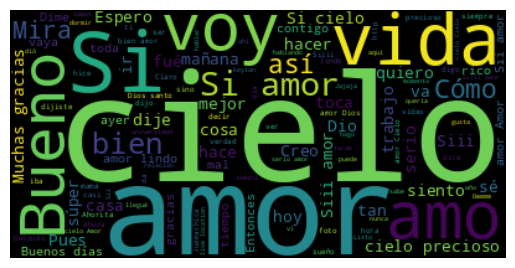

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
stop_words_es = stopwords.words("spanish")
stop_words = stop_words_es +stopwords.words("english")
texto1 = text_clau
texto2 = text_keylan

nube = WordCloud(stopwords=stop_words).generate(texto1)
plt.imshow(nube,interpolation='bilinear')
plt.axis("off")
plt.show()

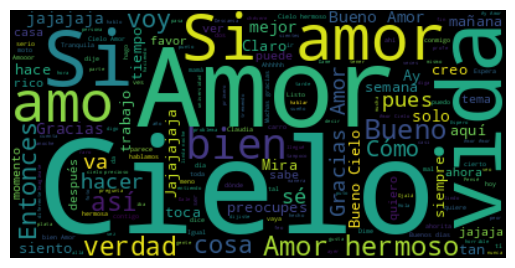

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
stop_words_es = stopwords.words("spanish")
stop_words = stop_words_es +stopwords.words("english")
texto1 = text_clau
texto2 = text_keylan

nube = WordCloud(stopwords=stop_words).generate(texto2)
plt.imshow(nube,interpolation='bilinear')
plt.axis("off")
plt.show()

In [63]:
#!pip install emoji
#import emoji
#!pip uninstall emoji
#!Y
!pip install emoji==1.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=6e3345108bc76085ad45cb7141885102cc3c4b1651019c870210f84066c7a3ac
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [64]:
import emoji

In [65]:
def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)

    return emoji_list

In [67]:
#emojis_clau = get_emojis(text_clau)
print(emojis_clau)
#emojis_clau = pd.DataFrame(Counter(emojis_clau).most_common(), columns =['emoji', 'count'])

    emoji  count
0      ❤️    418
1       😂    204
2       🫣    187
3       😭    139
4       🤭    105
..    ...    ...
110     🙈      1
111     🤬      1
112     🙂      1
113     🤔      1
114    🗣️      1

[115 rows x 2 columns]


In [73]:
#emojis_keylan = get_emojis(text_keylan)
emojis_clau
#emojis_keylan = pd.DataFrame(Counter(emojis_keylan).most_common(), columns =['emoji', 'count'])

,emoji,count
0,❤️,418
1,😂,204
2,🫣,187
3,😭,139
4,🤭,105
...,...,...
110,🙈,1
111,🤬,1
112,🙂,1
113,🤔,1


In [80]:
#emojis_clau = get_emojis(text_clau)
#emojis_keylan = pd.DataFrame(Counter(emojis_clau).most_common(), columns =['emoji', 'count'])
#emojis_keylan['emoji'].unique()

df[(df['type']=='Textos') & (df['Usuario']==' 🌞 Keylan Valencia 🌞')]['Texto'].value_counts().reset_index().head(16)

,index,Texto
0,Amor,241
1,😂,160
2,Cielo,151
3,♥️,138
4,Si amor,115
5,Te amo,95
6,Bueno Amor,63
7,😮,59
8,Bueno Cielo,57
9,No te preocupes,56


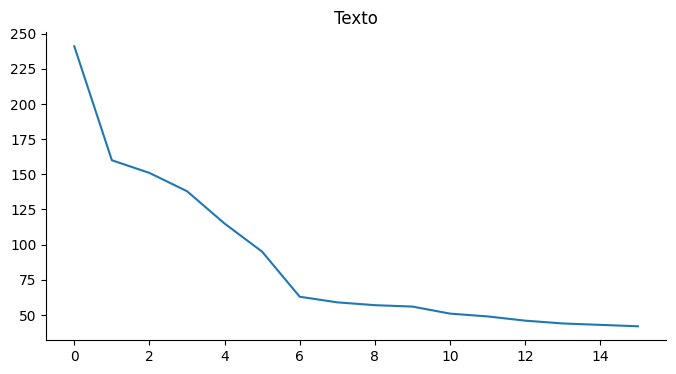

In [146]:
from matplotlib import pyplot as plt
_df_1['Texto'].plot(kind='line', figsize=(8, 4), title='Texto')
plt.gca().spines[['top', 'right']].set_visible(False)

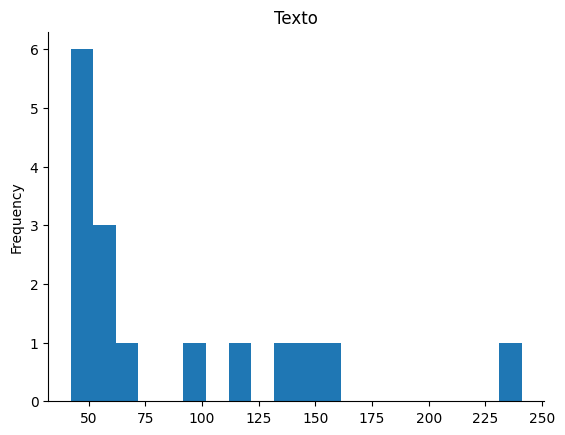

In [147]:
from matplotlib import pyplot as plt
_df_0['Texto'].plot(kind='hist', bins=20, title='Texto')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [81]:
print(emojis_clau)

    emoji  count
0      ❤️    418
1       😂    204
2       🫣    187
3       😭    139
4       🤭    105
..    ...    ...
110     🙈      1
111     🤬      1
112     🙂      1
113     🤔      1
114    🗣️      1

[115 rows x 2 columns]


In [82]:
line_list = [text_clau]
new_line_list = []

for word in line_list:
  emojis = emoji.distinct_emoji_list(word)
  new_line_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

In [83]:
print(emojis)

['🌜', '😜', '👌', '😮', '😘', '💋', '💎', '😮\u200d💨', '🙈', '🙂', '😳', '😙', '🌻', '😲', '🥲', '♥', '💷', '💖', '💅🏼', '💪', '😨', '😶\u200d🌫', '🚅', '💟', '💘', '😍', '☀️', '💨', '🤑', '🎁', '💰', '💵', '😐', '👀', '\U0001fad8', '😻', '😭', '😁', '😑', '😣', '🥝', '🙁', '😖', '💩', '❤️', '👄', '🗣️', '\U0001f979', '⛽', '😞', '🤣', '💞', '😗', '💅🏻', '🙃', '\U0001faf0🏼', '💗', '🥱', '💳', '🌝', '🤨', '🤢', '😚', '🤩', '♥️', '🧛\u200d♂️', '😡', '😔', '😋', '🥸', '😒', '💴', '🤬', '🌍', '🤯', '😏', '💲', '☺️', '❣️', '🎂', '💱', '♨️', '🥺', '🧧', '💝', '🏧', '🙏', '💕', '💔', '🤔', '🙄', '😵', '😂', '🤭', '😕', '☹️', '💓', '🍱', '🙊', '💶', '\U0001faf3', '\U0001fae3', '😴', '📦', '😊', '😈', '🤗', '🐸', '🤓', '👁️', '♾️', '🥰', '\U0001faf0🏻', '🛫', '🪙']


In [84]:
threshold = 10

print("Claudia")
mask_clau = emojis_clau['count'] < threshold
print(f"Others emojis: {emojis_clau.shape[0]-emojis_clau[~mask_clau].shape[0]}")
for e in emojis_clau[mask_clau]['emoji'].values:
    print(e, end=" ")

print(end="\n\n")

for e in emojis_clau[~mask_clau]['emoji'].values:
    print(e, end=" ")


print(end="\n\n")

print("Keylan")
mask_keylan = emojis_keylan['count'] < threshold
print(f"Others emojis: {emojis_keylan.shape[0]-emojis_keylan[~mask_keylan].shape[0]}")
for e in emojis_keylan[mask_keylan]['emoji'].values:
    print(e, end=" ")

print(end="\n\n")

for e in emojis_keylan[~mask_keylan]['emoji'].values:
    print(e, end=" ")

emojis_clau['user'] = 'Claudia'
emojis_keylan['user'] = 'Keylan'
pd.concat([emojis_clau,emojis_keylan]).to_csv("emojisALL.csv")


Claudia
Others emojis: 85
♥️ 😍 😊 😨 😕 🙁 ♥ 💓 💅🏼 ❣️ 💝 💗 💞 ☺️ 🤗 😋 💵 💰 😐 🌜 🤯 💘 😈 👀 😘 🍱 😵 😶‍🌫 💅🏻 😑 😜 😻 🙄 🌻 🎁 🪙 🤩 😗 💖 ☀️ 🙏 💪 😙 😲 💨 🚅 💩 🥝 🫘 📦 🫳 😁 ♾️ 🌍 🛫 🥱 😚 🎂 ⛽ 💎 💴 💶 💷 💳 🧧 🏧 💲 💱 🤑 👌 😮‍💨 🤓 🐸 😴 ♨️ 🥸 😳 🧛‍♂️ 💋 💟 🙈 🤬 🙂 🤔 🗣️ 

❤️ 😂 🫣 😭 🤭 🥺 🫰🏼 😣 😒 😡 🫰🏻 🥹 😖 🙃 ☹️ 💕 🤨 🤣 😞 👄 😏 🥲 😔 🤢 😮 🙊 🥰 🌝 💔 👁️ 

Keylan
Others emojis: 112
❤️ 🥵 🤔 😳 😌 🫤 👀 😨 😤 😔 🍆 😱 🙃 🫠 😈 😜 🫡 😪 🍑 🤬 🐕 ☺️ 😋 🚩 😴 👆🏻 😲 😠 😬 😉 💥 🤑 🤠 😮‍💨 😯 👇🏻 🐄 😁 😵‍💫 😓 🤩 👌🏻 🤧 💅 💕 👉🏻 👈🏻 🤤 💋 👁️ 🦷 😟 👅 🎳 🕊️ 🤟🏻 🚈 🐸 😅 ⚠️ 🐮 😊 👨🏻‍🦲 ⏲️ 🫑 🌶️ 💪🏻 🤗 🍱 📦 ☑️ 🎁 🥱 🤐 🥠 🙄 🍧 🍫 🙉 ➕ 💯 🔫 🐂 🐀 🙏 🥑 🕺 ❣️ 🤷🏼‍♂️ 😇 👍🏻 ✨ 🌺 👿 😺 🐈 😙 🍊 👏 🎉 🏒 🚲 👫 🫂 💘 💦 💎 ⏰ 🤦🏽‍♂️ 🐱 🥸 🚽 

😂 ♥️ 😮 😡 ☹️ 🥺 😑 🙁 😭 😒 🥹 😞 😩 💔 😣 😃 🫣 🥰 😍 🤦🏼‍♂️ 😖 🙊 🤣 🥴 😫 😘 🫶🏻 🙂 

In [85]:
df_emojis = pd.concat([emojis_clau, emojis_keylan], ignore_index=True)
df_emojis['emojis'] = 'Emojis'
df_emojis.to_csv("emojisALL.csv")

In [86]:
fig = px.treemap(df_emojis,
                 path=['emojis', 'user', 'emoji'],
                 values='count',
                 color='user',
                 color_discrete_map={'(?)': "light_gray",
                                     'Claudia': color_clau,
                                     'Keylan': color_keylan},
                hover_name="user")
fig.show()



pio.write_html(fig, file='fig.html', auto_open=True)

In [87]:
pio.write_html(fig, file='Plot3.html', auto_open=True)